In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = "Data Jumlah penduduk Miskin di Indonesia berdasarkan Pulau pada tahun 2023.xlsx"
df = pd.read_excel(path, sheet_name=0, header=1)

# Filter out rows where 'No.' is not a number, which are likely island headers or other non-data rows
df_filtered = df[pd.to_numeric(df['No.'], errors='coerce').notna()].copy()
df_filtered['No.'] = pd.to_numeric(df_filtered['No.'])


# Define the ranges for each island based on the 'No.' column
java_range = (1, 120)
bali_range = (121, 129)
sumatra_range = (130, 276)

# Extract data for each island using the defined ranges and original column names
df_java = df_filtered[(df_filtered['No.'] >= java_range[0]) & (df_filtered['No.'] <= java_range[1])][['No.', 'Kota & Kabupaten', 'Jumlah Penduduk Miskin']].copy()
df_bali = df_filtered[(df_filtered['No.'] >= bali_range[0]) & (df_filtered['No.'] <= bali_range[1])][['No.', 'Kota & Kabupaten', 'Jumlah Penduduk Miskin']].copy()
df_sumatra = df_filtered[(df_filtered['No.'] >= sumatra_range[0]) & (df_filtered['No.'] <= sumatra_range[1])][['No.', 'Kota & Kabupaten', 'Jumlah Penduduk Miskin']].copy()

# Add island classification to each dataframe
df_java['Pulau'] = 'Jawa'
df_sumatra['Pulau'] = 'Sumatra'
df_bali['Pulau'] = 'Bali'

# Select random samples from each island
java_sample = df_java.sample(n=10, random_state=42)
sumatra_sample = df_sumatra.sample(n=10, random_state=42)
bali_sample = df_bali.sample(n=5, random_state=42)

# Concatenate the samples and display
random_sample_df = pd.concat([java_sample, sumatra_sample, bali_sample])

# Display the requested columns and head
display(
    random_sample_df[['Pulau', 'Kota & Kabupaten', 'Jumlah Penduduk Miskin']]
    .head(25)
    .style.format({'Jumlah Penduduk Miskin': '{:,.2f} Ribu Jiwa'}))

,Pulau,Kota & Kabupaten,Jumlah Penduduk Miskin
45,Jawa,Majalengka,138.70 Ribu Jiwa
48,Jawa,Subang,152.30 Ribu Jiwa
5,Jawa,Kabupaten Kebumen,195.45 Ribu Jiwa
56,Jawa,Kota Bandung,102.80 Ribu Jiwa
27,Jawa,Kabupaten Pemalang,195.57 Ribu Jiwa
65,Jawa,Bantul,128.51 Ribu Jiwa
74,Jawa,Kediri,171.18 Ribu Jiwa
11,Jawa,Kabupaten Sukoharjo,68.79 Ribu Jiwa
41,Jawa,Tasikmalaya,186.90 Ribu Jiwa
108,Jawa,Jakarta Selatan,71.90 Ribu Jiwa


In [ ]:
print(df.dtypes)

No.                        object
Kota & Kabupaten           object
Jumlah Penduduk Miskin    float64
Unnamed: 3                 object
dtype: object


In [ ]:
df.describe()

,Jumlah Penduduk Miskin
count,276.000000
mean,71.973623
std,70.209279
min,1.470000
25%,21.442500
50%,43.855000
75%,105.055000
max,453.800000


# <strong>1. Cara Manual</strong>

In [ ]:
total_penduduk_miskin_jawa = df_java['Jumlah Penduduk Miskin'].sum()
total_penduduk_miskin_sumatra = df_sumatra['Jumlah Penduduk Miskin'].sum()
total_penduduk_miskin_bali = df_bali['Jumlah Penduduk Miskin'].sum()

total_penduduk_miskin_jawa_2 = total_penduduk_miskin_jawa / 1000
total_penduduk_miskin_sumatra_2 = total_penduduk_miskin_sumatra / 1000
total_penduduk_miskin_bali_2 = total_penduduk_miskin_bali / 1000

print("\nPenduduk Miskin berdasarkan Tiap Pulaunya")
print(f"Total Jumlah penduduk Miskin di Jawa: {total_penduduk_miskin_jawa_2:.2f} Juta Jiwa")
print(f"Total Jumlah penduduk Miskin di Sumatra: {total_penduduk_miskin_sumatra_2:.2f} Juta Jiwa")
print(f"Total Jumlah penduduk Miskin di Bali: {total_penduduk_miskin_bali_2:.3f} Juta Jiwa")

total_Jumlah_penduduk_miskin = (total_penduduk_miskin_jawa + total_penduduk_miskin_sumatra + total_penduduk_miskin_bali)

print("\nTotal Penduduk Miskin")
print(f"Total Jumlah penduduk Miskin di seluruh pulau (Kota & Kabupaten): {total_Jumlah_penduduk_miskin:.2f} Juta Jiwa")


Penduduk Miskin berdasarkan Tiap Pulaunya
Total Jumlah penduduk Miskin di Jawa: 14.07 Juta Jiwa
Total Jumlah penduduk Miskin di Sumatra: 5.60 Juta Jiwa
Total Jumlah penduduk Miskin di Bali: 0.194 Juta Jiwa

Total Penduduk Miskin
Total Jumlah penduduk Miskin di seluruh pulau (Kota & Kabupaten): 19864.72 Juta Jiwa


In [ ]:
Rata_penduduk_miskin_jawa = df_java['Jumlah Penduduk Miskin'].mean()
Rata_penduduk_miskin_sumatra = df_sumatra['Jumlah Penduduk Miskin'].mean()
Rata_penduduk_miskin_bali = df_bali['Jumlah Penduduk Miskin'].mean()

print("\nRata-Rata Jumlah Penduduk Miskin berdasarkan tiap pulaunya")
print(f"Rata-rata jumlah penduduk miskin di Jawa: {Rata_penduduk_miskin_jawa:.2f} Ribu Jiwa")
print(f"Rata-rata jumlah penduduk miskin di Sumatra: {Rata_penduduk_miskin_sumatra:.2f} Ribu Jiwa")
print(f"Rata-rata jumlah penduduk miskin di Bali: {Rata_penduduk_miskin_bali:.2f} Ribu Jiwa")

all_islands_poor = pd.concat([df_java['Jumlah Penduduk Miskin'], df_sumatra['Jumlah Penduduk Miskin'], df_bali['Jumlah Penduduk Miskin']])

overall_mean_poor = all_islands_poor.mean()

print("\nRata-Rata Jumlah Penduduk Miskin")
print(f"Rata-rata jumlah penduduk miskin di seluruh kota dan kabupaten adalah: {overall_mean_poor:.2f} Ribu Jiwa")


Rata-Rata Jumlah Penduduk Miskin berdasarkan tiap pulaunya
Rata-rata jumlah penduduk miskin di Jawa: 117.25 Ribu Jiwa
Rata-rata jumlah penduduk miskin di Sumatra: 38.10 Ribu Jiwa
Rata-rata jumlah penduduk miskin di Bali: 21.53 Ribu Jiwa

Rata-Rata Jumlah Penduduk Miskin
Rata-rata jumlah penduduk miskin di seluruh kota dan kabupaten adalah: 71.97 Ribu Jiwa


In [ ]:
# Gabungkan kolom 'Jumlah Penduduk Miskin' dari semua kerangka data pulau
all_islands_poor_series = pd.concat([df_java['Jumlah Penduduk Miskin'], df_sumatra['Jumlah Penduduk Miskin'], df_bali['Jumlah Penduduk Miskin']])

# Hitung median dari gabungan seri
median_poor_all_islands = all_islands_poor_series.median()

# Gabungkan kerangka data pulau asli untuk menemukan baris yang sesuai dengan median
all_islands_df = pd.concat([df_java, df_sumatra, df_bali])

# Temukan indeks nilai yang paling dekat dengan median
closest_index = (all_islands_poor_series - median_poor_all_islands).abs().idxmin()

# Dapatkan baris dari kerangka data gabungan menggunakan indeks terdekat
closest_row = all_islands_df.reset_index(drop=True).loc[closest_index]

# Ekstrak kota/kabupaten dan nilai terdekat
median_city_district = closest_row['Kota & Kabupaten']
closest_poor_value = closest_row['Jumlah Penduduk Miskin']

# Cetak nilai median dan kota/kabupaten yang sesuai dalam bahasa Indonesia
print(f"Median jumlah penduduk miskin di seluruh kota dan kabupaten adalah: {median_poor_all_islands:.2f} Ribu Jiwa")
print(f"Kota/Kabupaten dengan jumlah penduduk miskin terdekat dengan median adalah: {median_city_district} ({closest_poor_value:.2f} Ribu Jiwa)")

Median jumlah penduduk miskin di seluruh kota dan kabupaten adalah: 43.86 Ribu Jiwa
Kota/Kabupaten dengan jumlah penduduk miskin terdekat dengan median adalah:  Kota Salatiga (9.41 Ribu Jiwa)


In [ ]:
# 1. Temukan nilai minimum 'Jumlah Penduduk Miskin' untuk DataFrame setiap pulau
min_poor_java = df_java['Jumlah Penduduk Miskin'].min()
min_poor_sumatra = df_sumatra['Jumlah Penduduk Miskin'].min()
min_poor_bali = df_bali['Jumlah Penduduk Miskin'].min()

# 2. Urutkan setiap DataFrame pulau berdasarkan 'Jumlah Penduduk Miskin' dalam urutan menaik
df_java_sorted = df_java.sort_values(by='Jumlah Penduduk Miskin', ascending=True).reset_index(drop=True)
df_sumatra_sorted = df_sumatra.sort_values(by='Jumlah Penduduk Miskin', ascending=True).reset_index(drop=True)
df_bali_sorted = df_bali.sort_values(by='Jumlah Penduduk Miskin', ascending=True).reset_index(drop=True)

# 3. Pilih 10 baris teratas dari DataFrame df_java dan df_sumatra yang diurutkan
top_10_lowest_java = df_java_sorted.head(10)
top_10_lowest_sumatra = df_sumatra_sorted.head(10)

# 4. Pilih 3 baris teratas dari DataFrame df_bali yang diurutkan
top_3_lowest_bali = df_bali_sorted.head(3)

# 5. Cetak jumlah penduduk miskin minimum untuk setiap pulau di Indonesia
print("--- Minimum Jumlah Penduduk Miskin per Pulau ---")
print(f"Minimum Jumlah Penduduk Miskin di Jawa: {min_poor_java:.2f} Ribu Jiwa")
print(f"Minimum Jumlah Penduduk Miskin di Sumatra: {min_poor_sumatra:.2f} Ribu Jiwa")
print(f"Minimum Jumlah Penduduk Miskin di Bali: {min_poor_bali:.2f} Ribu Jiwa")

# 6. Cetak kota/kabupaten teratas dengan jumlah penduduk miskin terendah di Indonesia
print("\n--- Top Kota/Kabupaten dengan Jumlah Penduduk Miskin Terendah ---")

print("\nJawa (Top 10):")
display(top_10_lowest_java[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

print("\nSumatra (Top 10):")
display(top_10_lowest_sumatra[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

print("\nBali (Top 3):")
display(top_3_lowest_bali[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

--- Minimum Jumlah Penduduk Miskin per Pulau ---
Minimum Jumlah Penduduk Miskin di Jawa: 3.47 Ribu Jiwa
Minimum Jumlah Penduduk Miskin di Sumatra: 1.47 Ribu Jiwa
Minimum Jumlah Penduduk Miskin di Bali: 10.22 Ribu Jiwa

--- Top Kota/Kabupaten dengan Jumlah Penduduk Miskin Terendah ---

Jawa (Top 10):


,Kota & Kabupaten,Jumlah Penduduk Miskin
0,Kep Seribu,3.47 Ribu Jiwa
1,Kota Batu,7.10 Ribu Jiwa
2,Kota Magelang,7.45 Ribu Jiwa
3,Kota Mojokerto,7.65 Ribu Jiwa
4,Kota Madiun,8.46 Ribu Jiwa
5,Kota Salatiga,9.41 Ribu Jiwa
6,Kota Blitar,10.61 Ribu Jiwa
7,Kota Banjar,11.70 Ribu Jiwa
8,Kota Pasuruan,13.56 Ribu Jiwa
9,Kota Probolinggo,15.86 Ribu Jiwa



Sumatra (Top 10):


,Kota & Kabupaten,Jumlah Penduduk Miskin
0,Kota Sawah Lunto,1.47 Ribu Jiwa
1,Kota Solok,2.35 Ribu Jiwa
2,KOTA SUNGAI PENUH,2.66 Ribu Jiwa
3,Kota Padang Panjang,2.99 Ribu Jiwa
4,Kepulauan Anambas,3.08 Ribu Jiwa
5,Kota Pariaman,3.91 Ribu Jiwa
6,Pakpak Bharat,4.01 Ribu Jiwa
7,Natuna,4.30 Ribu Jiwa
8,SABANG,5.14 Ribu Jiwa
9,Kota Bukittinggi,5.78 Ribu Jiwa



Bali (Top 3):


,Kota & Kabupaten,Jumlah Penduduk Miskin
0,Kab. Klungkung,10.22 Ribu Jiwa
1,Kab. Bangli,12.24 Ribu Jiwa
2,Kab. Jembrana,14.12 Ribu Jiwa


Bagian ini menghitung dan menampilkan jumlah penduduk miskin minimum untuk setiap pulau (Jawa, Sumatra, dan Bali). Selain itu, bagian ini juga menampilkan daftar kota/kabupaten dengan jumlah penduduk miskin terendah untuk setiap pulau (Top 10 untuk Jawa dan Sumatra, Top 3 untuk Bali). Informasi ini memberikan gambaran tentang wilayah-wilayah dengan tingkat kemiskinan terendah di setiap pulau.

In [ ]:
# 1. Temukan nilai maksimum 'Jumlah Penduduk Miskin' untuk DataFrame setiap pulau
max_poor_java = df_java['Jumlah Penduduk Miskin'].max()
max_poor_sumatra = df_sumatra['Jumlah Penduduk Miskin'].max()
max_poor_bali = df_bali['Jumlah Penduduk Miskin'].max()

# 2. Urutkan setiap DataFrame pulau berdasarkan 'Jumlah Penduduk Miskin' dalam urutan menurun
df_java_sorted_desc = df_java.sort_values(by='Jumlah Penduduk Miskin', ascending=False).reset_index(drop=True)
df_sumatra_sorted_desc = df_sumatra.sort_values(by='Jumlah Penduduk Miskin', ascending=False).reset_index(drop=True)
df_bali_sorted_desc = df_bali.sort_values(by='Jumlah Penduduk Miskin', ascending=False).reset_index(drop=True)

# 3. Pilih 10 baris teratas dari Java dan Sumatra DataFrames yang diurutkan
top_10_highest_java = df_java_sorted_desc.head(10)
top_10_highest_sumatra = df_sumatra_sorted_desc.head(10)

# 4. Pilih 3 baris teratas dari Bali DataFrame yang diurutkan
top_3_highest_bali = df_bali_sorted_desc.head(3)

# 5. Cetak jumlah penduduk miskin maksimum untuk setiap pulau di Indonesia
print("--- Maksimum Jumlah Penduduk Miskin per Pulau ---")
print(f"Maksimum Jumlah Penduduk Miskin di Jawa: {max_poor_java:.2f} Ribu Jiwa")
print(f"Maksimum Jumlah Penduduk Miskin di Sumatra: {max_poor_sumatra:.2f} Ribu Jiwa")
print(f"Maksimum Jumlah Penduduk Miskin di Bali: {max_poor_bali:.2f} Ribu Jiwa")

# 6. Cetak kota/kabupaten teratas dengan jumlah penduduk miskin tertinggi di Indonesia
print("\n--- Top Kota/Kabupaten dengan Jumlah Penduduk Miskin Tertinggi ---")

# 7. Menampilkan 10 kota/kabupaten dengan jumlah penduduk miskin tertinggi di Jawa dan Sumatera
print("\nJawa (Top 10):")
display(top_10_highest_java[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

print("\nSumatra (Top 10):")
display(top_10_highest_sumatra[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

# 8. Menampilkan 3 kota/kabupaten dengan jumlah penduduk miskin tertinggi di Bali
print("\nBali (Top 3):")
display(top_3_highest_bali[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

--- Maksimum Jumlah Penduduk Miskin per Pulau ---
Maksimum Jumlah Penduduk Miskin di Jawa: 453.80 Ribu Jiwa
Maksimum Jumlah Penduduk Miskin di Sumatra: 187.28 Ribu Jiwa
Maksimum Jumlah Penduduk Miskin di Bali: 39.52 Ribu Jiwa

--- Top Kota/Kabupaten dengan Jumlah Penduduk Miskin Tertinggi ---

Jawa (Top 10):


,Kota & Kabupaten,Jumlah Penduduk Miskin
0,Bogor,453.80 Ribu Jiwa
1,D.I. Yogyakarta,448.47 Ribu Jiwa
2,Kabupaten Brebes,286.14 Ribu Jiwa
3,Kab Tangerang,276.33 Ribu Jiwa
4,Garut,260.50 Ribu Jiwa
5,Malang,251.36 Ribu Jiwa
6,Cirebon,249.20 Ribu Jiwa
7,Bandung,245.50 Ribu Jiwa
8,Cianjur,240.10 Ribu Jiwa
9,Jember,236.46 Ribu Jiwa



Sumatra (Top 10):


,Kota & Kabupaten,Jumlah Penduduk Miskin
0,Medan,187.28 Ribu Jiwa
1,Palembang,179.45 Ribu Jiwa
2,Lampung Timur,148.26 Ribu Jiwa
3,Lampung Tengah,140.29 Ribu Jiwa
4,Lampung Selatan,133.67 Ribu Jiwa
5,Ogan Komering Ilir,114.48 Ribu Jiwa
6,Lampung Utara,107.21 Ribu Jiwa
7,ACEH UTARA,106.77 Ribu Jiwa
8,Musi Banyuasin,101.63 Ribu Jiwa
9,Langkat,98.16 Ribu Jiwa



Bali (Top 3):


,Kota & Kabupaten,Jumlah Penduduk Miskin
0,Kab. Buleleng,39.52 Ribu Jiwa
1,Kab. Karangasem,27.83 Ribu Jiwa
2,Kota Denpasar,27.69 Ribu Jiwa


Bagian ini menghitung dan menampilkan jumlah penduduk miskin maksimum untuk setiap pulau (Jawa, Sumatra, dan Bali). Selain itu, bagian ini juga menampilkan daftar kota/kabupaten dengan jumlah penduduk miskin tertinggi untuk setiap pulau (Top 10 untuk Jawa dan Sumatra, Top 3 untuk Bali). Informasi ini memberikan gambaran tentang wilayah-wilayah dengan tingkat kemiskinan tertinggi di setiap pulau.

In [ ]:
std_poor_java = df_java['Jumlah Penduduk Miskin'].std()
std_poor_sumatra = df_sumatra['Jumlah Penduduk Miskin'].std()
std_poor_bali = df_bali['Jumlah Penduduk Miskin'].std()

print(f"Standar Deviasi tiap pulau-pulau")
print(f"Standar Deviasi Jumlah Penduduk Miskin di Jawa: {std_poor_java:.2f} Ribu Jiwa")
print(f"Standar Deviasi Jumlah Penduduk Miskin di Sumatra: {std_poor_sumatra:.2f} Ribu Jiwa")
print(f"Standar Deviasi Jumlah Penduduk Miskin di Bali: {std_poor_bali:.2f} Ribu Jiwa")

std_penduduk_miskin = all_islands_poor_series.std()
print("\nStandar Deviasi Jumlah Penduduk Miskin")
print(f"Standar Deviasi Jumlah Penduduk Miskin di seluruh pulau (Kota & Kabupaten): {std_penduduk_miskin:.2f} Ribu Jiwa")

Standar Deviasi tiap pulau-pulau
Standar Deviasi Jumlah Penduduk Miskin di Jawa: 79.93 Ribu Jiwa
Standar Deviasi Jumlah Penduduk Miskin di Sumatra: 32.80 Ribu Jiwa
Standar Deviasi Jumlah Penduduk Miskin di Bali: 9.33 Ribu Jiwa

Standar Deviasi Jumlah Penduduk Miskin
Standar Deviasi Jumlah Penduduk Miskin di seluruh pulau (Kota & Kabupaten): 70.21 Ribu Jiwa


In [ ]:
# Hitung rata-rata untuk setiap pulau
mean_poor_java = df_java['Jumlah Penduduk Miskin'].mean()
mean_poor_sumatra = df_sumatra['Jumlah Penduduk Miskin'].mean()
mean_poor_bali = df_bali['Jumlah Penduduk Miskin'].mean()

# Filter untuk kota/kabupaten yang secara signifikan lebih tinggi dari rata-rata (rata-rata + 1 standar dev)
significantly_high_java = df_java[df_java['Jumlah Penduduk Miskin'] > (mean_poor_java + std_poor_java)].copy()
significantly_high_sumatra = df_sumatra[df_sumatra['Jumlah Penduduk Miskin'] > (mean_poor_sumatra + std_poor_sumatra)].copy()
significantly_high_bali = df_bali[df_bali['Jumlah Penduduk Miskin'] > (mean_poor_bali + std_poor_bali)].copy()

significantly_high_java_2 = significantly_high_java.sort_values(by='Jumlah Penduduk Miskin', ascending=False)
significantly_high_sumatra_2 = significantly_high_sumatra.sort_values(by='Jumlah Penduduk Miskin', ascending=False)
significantly_high_bali_2 = significantly_high_bali.sort_values(by='Jumlah Penduduk Miskin', ascending=False)

# Cetak header dalam bahasa Indonesia
print("--- Kota/Kabupaten dengan Jumlah Penduduk Miskin Signifikan Lebih Tinggi dari Rata-rata Pulau ---")

# Menampilkan hasil untuk setiap pulau dalam bahasa Indonesia, diformat hingga dua angka desimal dengan unit "Ribu Jiwa"
print("\nJawa:")
display(significantly_high_java_2[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

print("\nSumatra:")
display(significantly_high_sumatra_2[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

print("\nBali:")
display(significantly_high_bali_2[['Kota & Kabupaten', 'Jumlah Penduduk Miskin']].style.format({'Jumlah Penduduk Miskin': '{:.2f} Ribu Jiwa'}))

--- Kota/Kabupaten dengan Jumlah Penduduk Miskin Signifikan Lebih Tinggi dari Rata-rata Pulau ---

Jawa:


,Kota & Kabupaten,Jumlah Penduduk Miskin
36,Bogor,453.80 Ribu Jiwa
63,D.I. Yogyakarta,448.47 Ribu Jiwa
29,Kabupaten Brebes,286.14 Ribu Jiwa
115,Kab Tangerang,276.33 Ribu Jiwa
40,Garut,260.50 Ribu Jiwa
75,Malang,251.36 Ribu Jiwa
44,Cirebon,249.20 Ribu Jiwa
39,Bandung,245.50 Ribu Jiwa
38,Cianjur,240.10 Ribu Jiwa
77,Jember,236.46 Ribu Jiwa



Sumatra:


,Kota & Kabupaten,Jumlah Penduduk Miskin
216,Medan,187.28 Ribu Jiwa
160,Palembang,179.45 Ribu Jiwa
135,Lampung Timur,148.26 Ribu Jiwa
136,Lampung Tengah,140.29 Ribu Jiwa
134,Lampung Selatan,133.67 Ribu Jiwa
148,Ogan Komering Ilir,114.48 Ribu Jiwa
137,Lampung Utara,107.21 Ribu Jiwa
266,ACEH UTARA,106.77 Ribu Jiwa
152,Musi Banyuasin,101.63 Ribu Jiwa
199,Langkat,98.16 Ribu Jiwa



Bali:


,Kota & Kabupaten,Jumlah Penduduk Miskin
129,Kab. Buleleng,39.52 Ribu Jiwa


Bagian ini menghitung standar deviasi jumlah penduduk miskin untuk setiap pulau (Jawa, Sumatra, dan Bali) dan untuk seluruh data. Standar deviasi mengukur sebaran data dari rata-rata. Selain itu, bagian ini mengidentifikasi dan menampilkan daftar kota/kabupaten di setiap pulau yang memiliki jumlah penduduk miskin signifikan lebih tinggi dari rata-rata pulau tersebut (diukur sebagai lebih dari satu standar deviasi di atas rata-rata). Informasi ini membantu mengidentifikasi wilayah-wilayah dengan tingkat kemiskinan yang relatif tinggi dibandingkan dengan rata-rata di pulau yang sama.

In [ ]:
# Hitung persentil ke-25, ke-50 (median), dan ke-75 untuk setiap pulau
quartiles_java = df_java['Jumlah Penduduk Miskin'].quantile([0.25, 0.5, 0.75])
quartiles_sumatra = df_sumatra['Jumlah Penduduk Miskin'].quantile([0.25, 0.5, 0.75])
quartiles_bali = df_bali['Jumlah Penduduk Miskin'].quantile([0.25, 0.5, 0.75])

# Print header
print("--- Kuartil Jumlah Penduduk Miskin per Pulau ---")

# Print quartiles untuk Jawa
print("\nJawa:")
print(f"  Kuartil 1 (25%): {quartiles_java[0.25]:.2f} Ribu Jiwa")
print(f"  Median (Kuartil 2 - 50%): {quartiles_java[0.5]:.2f} Ribu Jiwa")
print(f"  Kuartil 3 (75%): {quartiles_java[0.75]:.2f} Ribu Jiwa")

# Print quartiles untuk Sumatra
print("\nSumatra:")
print(f"  Kuartil 1 (25%): {quartiles_sumatra[0.25]:.2f} Ribu Jiwa")
print(f"  Median (Kuartil 2 - 50%): {quartiles_sumatra[0.5]:.2f} Ribu Jiwa")
print(f"  Kuartil 3 (75%): {quartiles_sumatra[0.75]:.2f} Ribu Jiwa")

# Print quartiles untuk Bali
print("\nBali:")
print(f"  Kuartil 1 (25%): {quartiles_bali[0.25]:.2f} Ribu Jiwa")
print(f"  Median (Kuartil 2 - 50%): {quartiles_bali[0.5]:.2f} Ribu Jiwa")
print(f"  Kuartil 3 (75%): {quartiles_bali[0.75]:.2f} Ribu Jiwa")

--- Kuartil Jumlah Penduduk Miskin per Pulau ---

Jawa:
  Kuartil 1 (25%): 70.55 Ribu Jiwa
  Median (Kuartil 2 - 50%): 107.31 Ribu Jiwa
  Kuartil 3 (75%): 150.53 Ribu Jiwa

Sumatra:
  Kuartil 1 (25%): 18.23 Ribu Jiwa
  Median (Kuartil 2 - 50%): 27.96 Ribu Jiwa
  Kuartil 3 (75%): 45.59 Ribu Jiwa

Bali:
  Kuartil 1 (25%): 14.12 Ribu Jiwa
  Median (Kuartil 2 - 50%): 21.42 Ribu Jiwa
  Kuartil 3 (75%): 27.69 Ribu Jiwa


Bagian ini menghitung dan menampilkan nilai kuartil dari jumlah penduduk miskin untuk setiap pulau (Jawa, Sumatra, dan Bali). Kuartil ini memberikan gambaran tentang distribusi jumlah penduduk miskin di setiap pulau, menunjukkan kisaran nilai di setiap seperempat data. Informasi ini berguna untuk memahami sebaran data dan mengidentifikasi potensi outlier atau konsentrasi kemiskinan.

# <strong>2. Alternatif lain</strong>

In [ ]:
print("--- Statistik Jumlah Penduduk Miskin per Pulau ---")
print("\nPulau Jawa")
kelas_group = df_java['Jumlah Penduduk Miskin'].agg(['mean', 'median', 'min', 'max', 'sum', 'std'])
display(kelas_group)

print("\nPulau Sumatra")
kelas_group_2 = df_sumatra['Jumlah Penduduk Miskin'].agg(['mean', 'median', 'min', 'max', 'sum', 'std'])
display(kelas_group_2)

print("\nPulau Bali")
kelas_group_3 = df_bali['Jumlah Penduduk Miskin'].agg(['mean', 'median', 'min', 'max', 'sum', 'std'])
display(kelas_group_3)

--- Statistik Jumlah Penduduk Miskin per Pulau ---

Pulau Jawa


,Jumlah Penduduk Miskin
mean,117.252917
median,107.310000
min,3.470000
max,453.800000
sum,14070.350000
std,79.926250



Pulau Sumatra


,Jumlah Penduduk Miskin
mean,38.099048
median,27.960000
min,1.470000
max,187.280000
sum,5600.560000
std,32.800113



Pulau Bali


,Jumlah Penduduk Miskin
mean,21.534444
median,21.420000
min,10.220000
max,39.520000
sum,193.810000
std,9.326168


Bagian ini menyajikan ringkasan statistik deskriptif untuk jumlah penduduk miskin di setiap pulau (Jawa, Sumatra, dan Bali) menggunakan metode `.agg()` pada DataFrame pandas.

<br>**Hubungan dengan "Cara Manual" (No. 1):**

<br>Bagian "Cara Manual" menghitung statistik deskriptif (seperti total, rata-rata, median, min, max, dan standar deviasi) secara terpisah untuk setiap metrik dan setiap pulau. Ini dilakukan dengan memanggil fungsi agregasi (seperti `.sum()`, `.mean()`, `.median()`, dll.) satu per satu pada kolom 'Jumlah Penduduk Miskin' dari setiap DataFrame pulau (`df_java`, `df_sumatra`, `df_bali`).

<br>Sebaliknya, bagian "Alternatif Lain" ini mencapai hasil yang sama dengan cara yang lebih ringkas dan efisien. Metode `.agg()` memungkinkan untuk menerapkan beberapa fungsi agregasi sekaligus ke satu atau lebih kolom dalam DataFrame atau Series. Dengan memberikan daftar nama fungsi agregasi (dalam hal ini, `['mean', 'median', 'min', 'max', 'sum', 'std']`) ke metode `.agg()` pada kolom 'Jumlah Penduduk Miskin' untuk setiap DataFrame pulau, dapat mendapatkan ringkasan statistik yang diinginkan dalam satu langkah.

<br>Metode `.agg()` (atau `aggregate`) adalah fungsi yang sangat fleksibel di pandas yang memungkinkan untuk melakukan satu atau lebih operasi agregasi pada data. Agregasi adalah proses di mana nilai-nilai dari beberapa baris dikelompokkan menjadi satu nilai ringkasan.

Keunggulan menggunakan `.agg()` dibandingkan memanggil setiap fungsi agregasi secara terpisah adalah:

1.  **Efisiensi Kode:** Kode menjadi lebih pendek dan lebih mudah dibaca, terutama ketika Anda perlu menghitung banyak statistik yang berbeda.
2.  **Performa:** Untuk kumpulan data yang besar, menggunakan `.agg()` bisa sedikit lebih efisien karena pandas dapat mengoptimalkan eksekusi beberapa agregasi sekaligus.
3.  **Fleksibilitas:** Anda dapat menerapkan fungsi agregasi yang berbeda ke kolom yang berbeda dalam satu panggilan `.agg()`. Anda juga dapat menggunakan fungsi kustom Anda sendiri.

# <Strong> 3. Visualisasi Data</strong>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

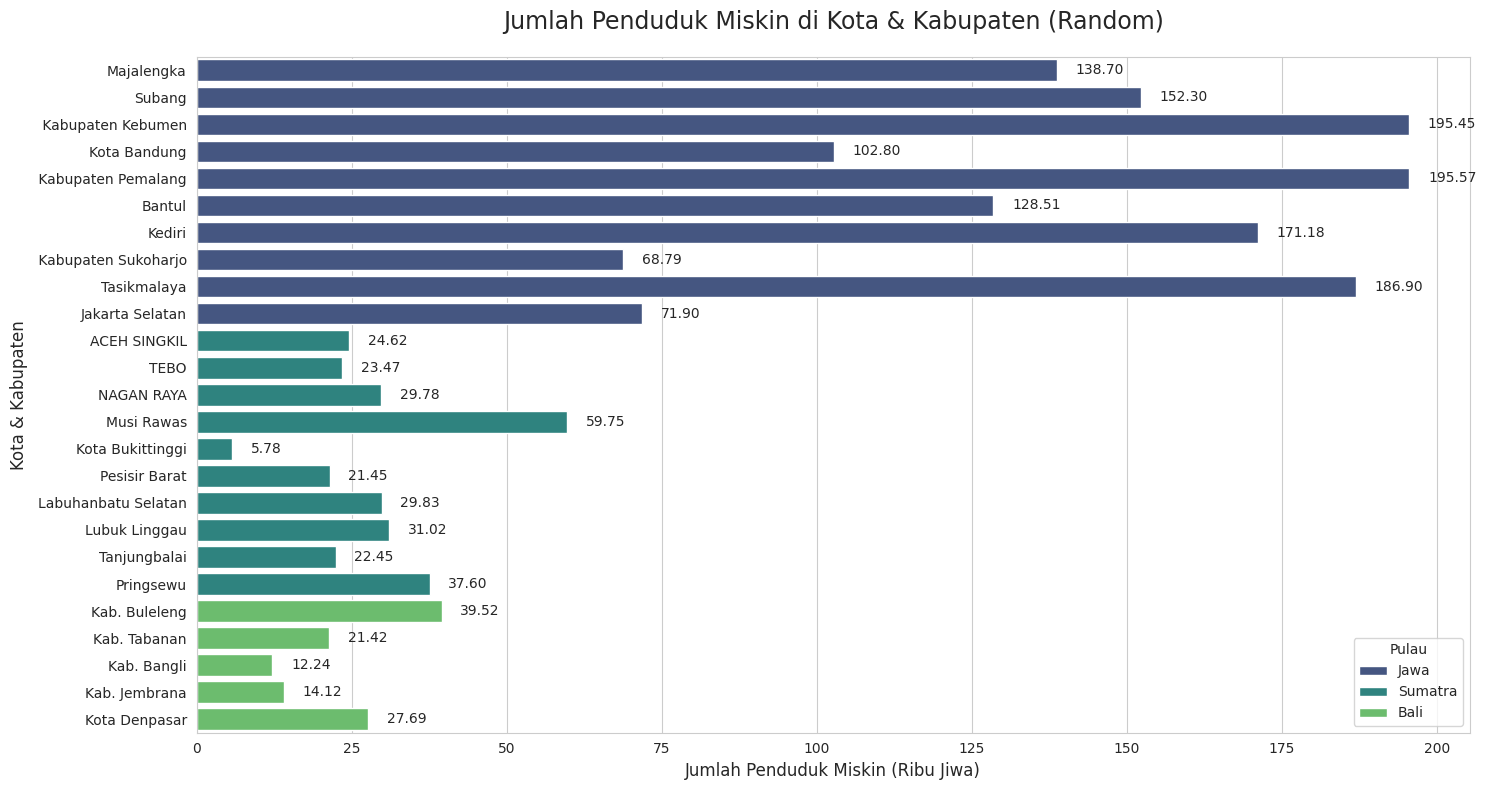

In [ ]:
plt.figure(figsize=(15, 8)) # Ukuran visualisasi yang besar
sns.set_style("whitegrid") # Gaya visualisasi yang bersih

sns.barplot(
    data=random_sample_df,
    x='Jumlah Penduduk Miskin',
    y='Kota & Kabupaten',
    hue='Pulau',
    dodge=False, # Memastikan batang tidak saling tumpang tindih
    palette='viridis' # Skema warna
)

plt.title('Jumlah Penduduk Miskin di Kota & Kabupaten (Random)', fontsize=17, pad=20)
plt.xlabel('Jumlah Penduduk Miskin (Ribu Jiwa)', fontsize=12)
plt.ylabel('Kota & Kabupaten', fontsize=12)

for index, value in enumerate(random_sample_df['Jumlah Penduduk Miskin']):
    plt.text(
        value + 3, # Posisi X (di sebelah kanan batang, ditambah 3 untuk jarak)
        index,     # Posisi Y (tinggi batang)
        f'{value:.2f}', # Nilai yang ditampilkan (diformat 2 desimal)
        va='center', # Penempatan vertikal
        fontsize=10
    )

plt.legend(title='Pulau', loc='lower right')
plt.tight_layout()
plt.show()

Visualisasi ini menyajikan sampel acak jumlah penduduk miskin dari beberapa kota dan kabupaten di Pulau Jawa, Sumatra, dan Bali. Setiap batang pada grafik merepresentasikan satu kota atau kabupaten, dan panjang batangnya menunjukkan jumlah penduduk miskin di wilayah tersebut dalam satuan Ribu Jiwa. Warna pada setiap batang mengindikasikan pulau asal kota atau kabupaten tersebut (Jawa, Sumatra, atau Bali). Visualisasi ini memberikan gambaran sekilas tentang variasi jumlah penduduk miskin di antara beberapa daerah terpilih dari pulau-pulau tersebut.

<Strong>Visualisasi Kota/Kabupaten yang memiliki Standar Deviasi Tinggi</strong>

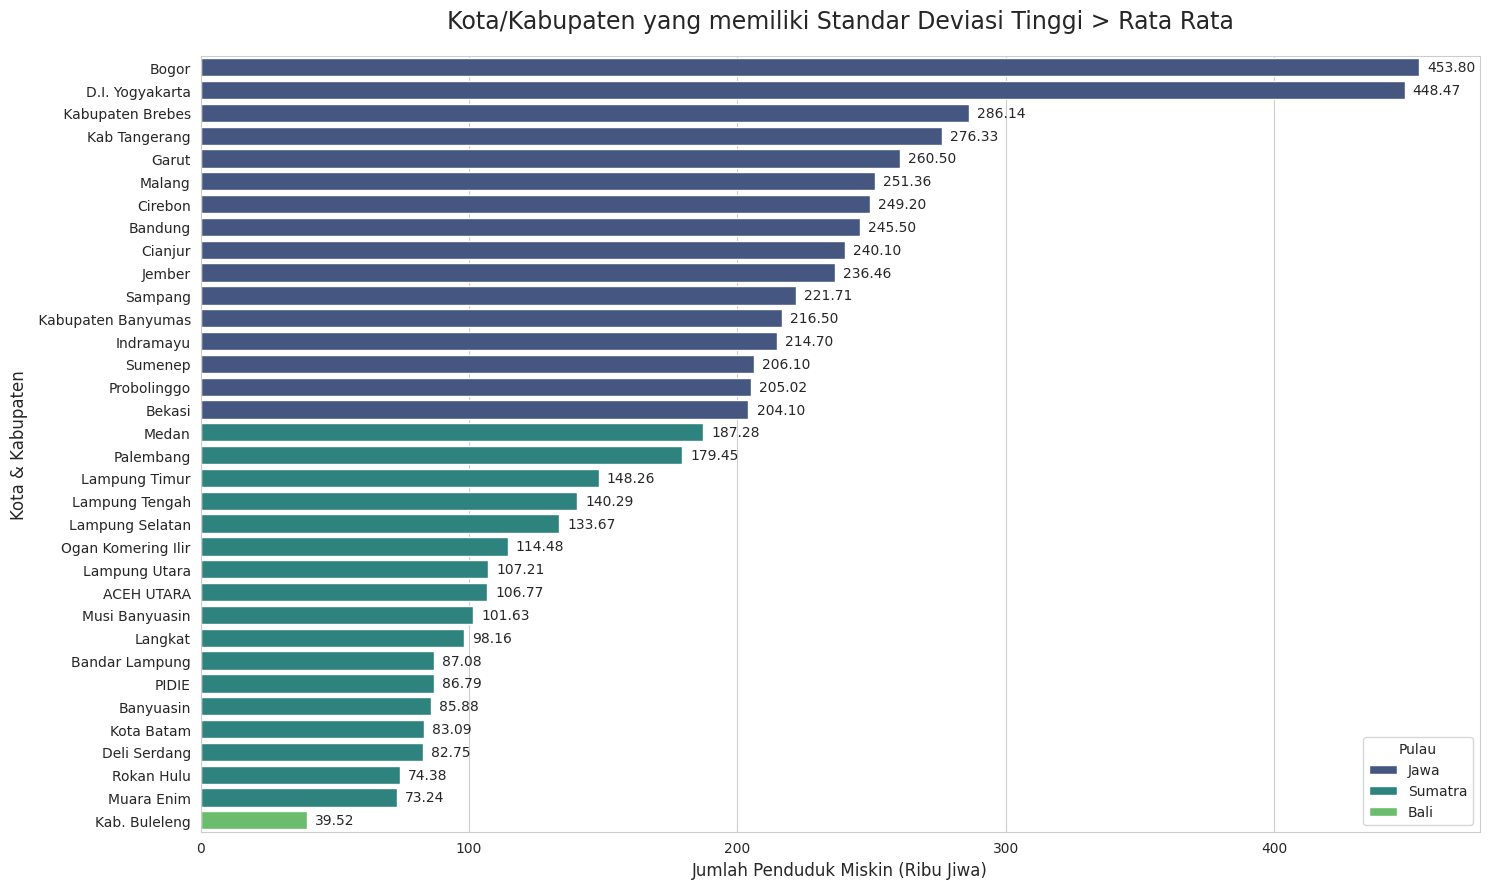

In [ ]:
gabungan_deviasi_tinggi = pd.concat([significantly_high_java_2, significantly_high_sumatra_2, significantly_high_bali_2])

plt.figure(figsize=(15, 9)) # Ukuran visualisasi yang besar
sns.set_style("whitegrid") # Gaya visualisasi yang bersih

sns.barplot(
    data=gabungan_deviasi_tinggi,
    x='Jumlah Penduduk Miskin',
    y='Kota & Kabupaten',
    hue='Pulau',
    dodge=False, # Memastikan batang tidak saling tumpang tindih
    palette='viridis' # Skema warna
)

plt.title('Kota/Kabupaten yang memiliki Standar Deviasi Tinggi > Rata Rata', fontsize=17, pad=20)
plt.xlabel('Jumlah Penduduk Miskin (Ribu Jiwa)', fontsize=12)
plt.ylabel('Kota & Kabupaten', fontsize=12)

for index, value in enumerate(gabungan_deviasi_tinggi['Jumlah Penduduk Miskin']):
    plt.text(
        value + 3, # Posisi X (di sebelah kanan batang, ditambah 3 untuk jarak)
        index,     # Posisi Y (tinggi batang)
        f'{value:.2f}', # Nilai yang ditampilkan (diformat 2 desimal)
        va='center', # Penempatan vertikal
        fontsize=10
    )

plt.legend(title='Pulau', loc='lower right')
plt.tight_layout()
plt.show()

Visualisasi ini menampilkan distribusi jumlah penduduk miskin untuk kota/kabupaten yang teridentifikasi memiliki standar deviasi jumlah penduduk miskin yang signifikan lebih tinggi dari rata-rata di pulau masing-masing (Jawa, Sumatra, dan Bali). Setiap batang merepresentasikan satu kota/kabupaten, dengan panjang batang menunjukkan jumlah penduduk miskin. Batang-batang diberi warna berdasarkan pulau asalnya. Visualisasi ini membantu menyoroti daerah-daerah dengan tingkat kemiskinan yang menonjol dibandingkan dengan wilayah lain di pulau yang sama.

<strong>Peringkat Jumlah Penduduk Miskin<strong>

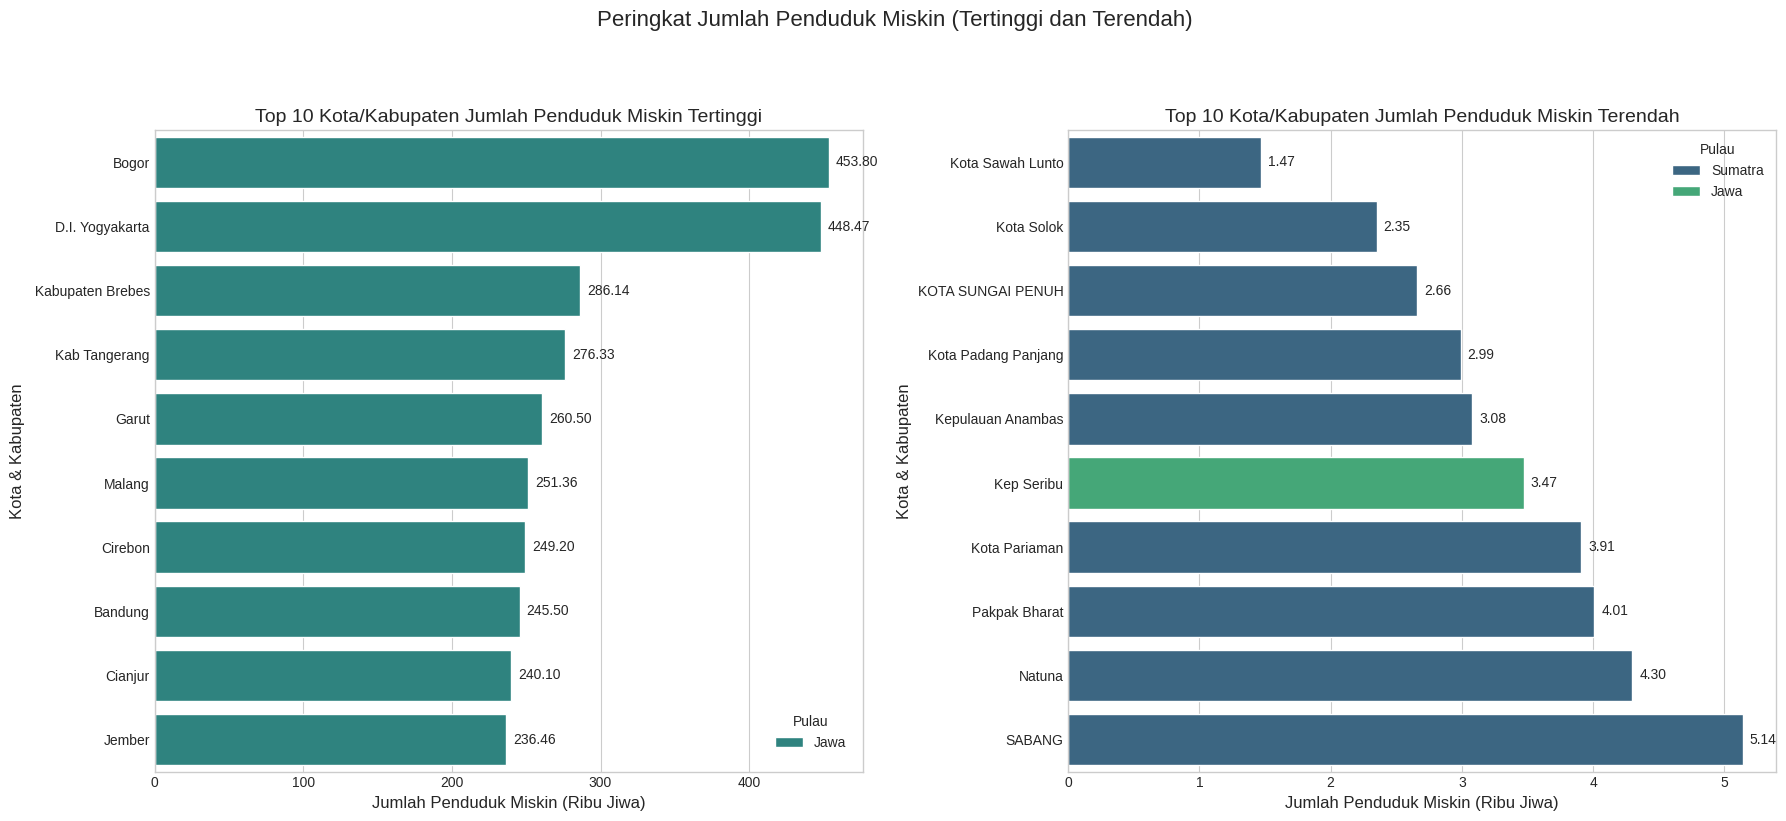

In [ ]:
top_10_highest = all_islands_df.sort_values(
    by='Jumlah Penduduk Miskin',
    ascending=False
).head(10).reset_index(drop=True)

top_10_lowest = all_islands_df.sort_values(
    by='Jumlah Penduduk Miskin',
    ascending=True
).head(10).reset_index(drop=True)

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False) # 1 baris, 2 kolom

# --- Subplot 1: Top 10 Tertinggi ---
sns.barplot(
    ax=axes[0],
    x='Jumlah Penduduk Miskin',
    y='Kota & Kabupaten',
    data=top_10_highest,
    hue='Pulau',
    palette='viridis', # Menggunakan palet 'viridis'
)
axes[0].set_title('Top 10 Kota/Kabupaten Jumlah Penduduk Miskin Tertinggi', fontsize=14)
axes[0].set_xlabel('Jumlah Penduduk Miskin (Ribu Jiwa)', fontsize=12)
axes[0].set_ylabel('Kota & Kabupaten', fontsize=12)

# Ambil handles dan labels dari subplot 1 untuk legenda tunggal
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend_.remove() # Hapus legenda dari subplot 1

# Tambahkan label nilai di batang
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', fontsize=10, padding=5)

# --- Subplot 2: Top 10 Terendah ---
sns.barplot(
    ax=axes[1],
    x='Jumlah Penduduk Miskin',
    y='Kota & Kabupaten',
    data=top_10_lowest,
    hue='Pulau',
    palette='viridis', # Menggunakan palet 'viridis'
)
axes[1].set_title('Top 10 Kota/Kabupaten Jumlah Penduduk Miskin Terendah', fontsize=14)
axes[1].set_xlabel('Jumlah Penduduk Miskin (Ribu Jiwa)', fontsize=12)
axes[1].set_ylabel('Kota & Kabupaten', fontsize=12)

# Tambahkan label nilai di batang
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', fontsize=10, padding=5)

# Atur tata letak dan judul utama
plt.suptitle('Peringkat Jumlah Penduduk Miskin (Tertinggi dan Terendah)', fontsize=16, y=1.02)

# Tambahkan legenda tunggal untuk seluruh figur
fig.legend(handles, labels, title='Pulau', loc='lower right', bbox_to_anchor=(0.48, 0.08))

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Sesuaikan layout untuk Suptitle
plt.show()

Visualisasi ini terdiri dari dua bar chart yang menampilkan peringkat kota/kabupaten berdasarkan jumlah penduduk miskin. Bar chart di sebelah kiri menunjukkan 10 kota/kabupaten dengan jumlah penduduk miskin tertinggi, sedangkan bar chart di sebelah kanan menampilkan 10 kota/kabupaten dengan jumlah penduduk miskin terendah dari seluruh pulau (Jawa, Sumatra, dan Bali) yang ada dalam data. Setiap batang merepresentasikan satu kota atau kabupaten, dengan panjang batang menunjukkan jumlah penduduk miskin dalam satuan Ribu Jiwa. Warna pada setiap batang mengindikasikan pulau asal kota atau kabupaten tersebut. Visualisasi ini memudahkan perbandingan daerah-daerah dengan tingkat kemiskinan ekstrem (tertinggi dan terendah).

<strong>Rata-rata jumlah Penduduk Miskin di tiap Pulau<strong>

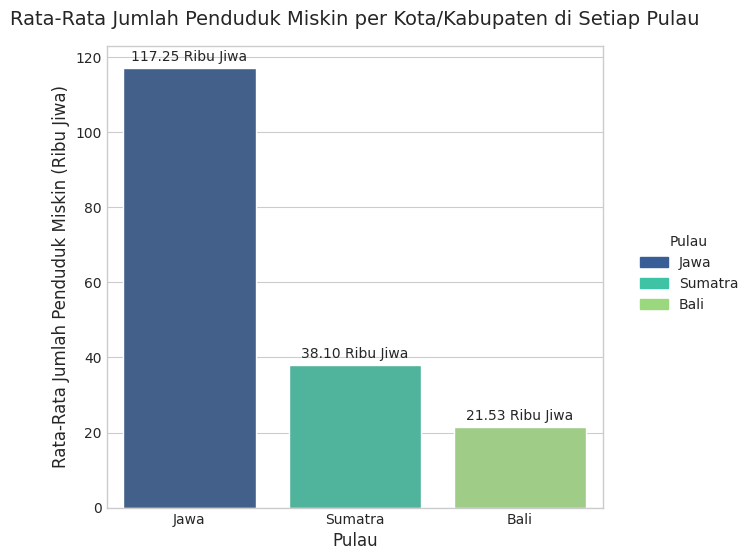

In [ ]:
# 1. Hitung Rata-Rata per Pulau (Tidak Berubah)
data_rata_rata = {
    'Pulau': ['Jawa', 'Sumatra', 'Bali'],
    'Rata-rata Jumlah Penduduk Miskin': [
        df_java['Jumlah Penduduk Miskin'].dropna().mean(),
        df_sumatra['Jumlah Penduduk Miskin'].dropna().mean(),
        df_bali['Jumlah Penduduk Miskin'].dropna().mean()
    ]
}
df_rata_rata = pd.DataFrame(data_rata_rata)

# --- PALET WARNA KUSTOM ---
custom_palette = {
    'Jawa': '#375E97',    # Biru Tua
    'Sumatra': '#3FC3A5', # Hijau Teal
    'Bali': '#9BD77C'     # Hijau Muda
}

# 2. Inisialisasi Plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")

# Buat Vertical Bar Chart
bar_plot = sns.barplot(
    ax=ax,
    x='Pulau',
    y='Rata-rata Jumlah Penduduk Miskin',
    data=df_rata_rata.sort_values(by='Rata-rata Jumlah Penduduk Miskin', ascending=False),
    hue='Pulau',
    palette=custom_palette,
    dodge=False,
    legend=False # Explicitly disable the default legend from seaborn
)

# Tambahkan Judul dan Label
ax.set_title('Rata-Rata Jumlah Penduduk Miskin per Kota/Kabupaten di Setiap Pulau', fontsize=14, pad=15)
ax.set_xlabel('Pulau', fontsize=12)
ax.set_ylabel('Rata-Rata Jumlah Penduduk Miskin (Ribu Jiwa)', fontsize=12)

# Tambahkan label nilai di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f Ribu Jiwa', fontsize=10, padding=3)

# 3. Kecilkan area plot (axes) untuk memberi ruang di kanan
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# --- Tambahkan legenda secara manual ---
# Impor matplotlib.patches
import matplotlib.patches as mpatches

# Buat patch untuk setiap warna dan label menggunakan mpatches.Patch
legend_patches = [mpatches.Patch(color=custom_palette[label], label=label) for label in custom_palette.keys()]

# Tambahkan legenda ke figure menggunakan fig.legend
fig.legend(handles=legend_patches, title='Pulau', loc='center right', bbox_to_anchor=(0.93, 0.5))
plt.show()

Visualisasi bar chart ini menampilkan rata-rata jumlah penduduk miskin per kota/kabupaten di setiap pulau (Jawa, Sumatra, dan Bali). Setiap batang merepresentasikan satu pulau, dan tingginya menunjukkan rata-rata jumlah penduduk miskin di kota/kabupaten di pulau tersebut dalam satuan Ribu Jiwa. Visualisasi ini membantu membandingkan tingkat rata-rata kemiskinan antar pulau.

# 4. Visualisasi Proporsi Kota & Kabupaten std tinggi terhadap sisa-sisa Pulau

## Gabungkan data

Gabungkan data kota/kabupaten dengan standar deviasi tinggi dari setiap pulau menjadi satu DataFrame.


In [ ]:
df_significantly_high = pd.concat([significantly_high_java_2, significantly_high_sumatra_2, significantly_high_bali_2]).reset_index(drop=True)

# Hitunglah jumlah kota/kabupaten dalam kelompok ini
num_cities_high_std = len(df_significantly_high)

## Hitung total penduduk miskin (standar deviasi tinggi)

Hitung total jumlah penduduk miskin dari kelompok kota/kabupaten dengan standar deviasi tinggi.


In [ ]:
# Ambil kolom 'Jumlah Penduduk Miskin' dari DataFrame df_significantly_high.
# Hitung jumlah total dari kolom tersebut menggunakan metode .sum().
total_poor_high_std = df_significantly_high['Jumlah Penduduk Miskin'].sum()

# Tampilkan hasilnya dalam format Juta Jiwa
print(f"Total jumlah penduduk miskin di kota/kabupaten dengan standar deviasi tinggi: {total_poor_high_std / 1000:.2f} Juta Jiwa")

Total jumlah penduduk miskin di kota/kabupaten dengan standar deviasi tinggi: 6.15 Juta Jiwa


## Hitung total penduduk miskin (sisa per pulau)

Hitung total jumlah penduduk miskin untuk sisa kota/kabupaten di masing-masing pulau (Jawa, Sumatra, Bali) yang *tidak* termasuk dalam kelompok standar deviasi tinggi.


In [ ]:
# Filter df java untuk memuat baris di mana 'Kota dan Kabupaten' ada di df_significantly_high
df_java_remaining = df_java[~df_java['Kota & Kabupaten'].isin(df_significantly_high['Kota & Kabupaten'])].copy()
total_poor_java_remaining = df_java_remaining['Jumlah Penduduk Miskin'].sum()
num_cities_java_remaining = len(df_java_remaining)

# Filter df sumatra untuk mengecualikan baris di mana 'Kota dan Kabupaten' ada di df_significantly_high
df_sumatra_remaining = df_sumatra[~df_sumatra['Kota & Kabupaten'].isin(df_significantly_high['Kota & Kabupaten'])].copy()
total_poor_sumatra_remaining = df_sumatra_remaining['Jumlah Penduduk Miskin'].sum()
num_cities_sumatra_remaining = len(df_sumatra_remaining)

# Filter df bali untuk mengecualikan baris di mana 'Kota dan Kabupaten' ada di df_significantly_high
df_bali_remaining = df_bali[~df_bali['Kota & Kabupaten'].isin(df_significantly_high['Kota & Kabupaten'])].copy()
total_poor_bali_remaining = df_bali_remaining['Jumlah Penduduk Miskin'].sum()
num_cities_bali_remaining = len(df_bali_remaining)


# Cetak hasilnya dalam format Juta Jiwa
print(f"Total jumlah penduduk miskin di sisa kota/kabupaten di Jawa: {total_poor_java_remaining / 1000:.2f} Juta Jiwa ({num_cities_java_remaining} Kota/Kabupaten)")
print(f"Total jumlah penduduk miskin di sisa kota/kabupaten di Sumatra: {total_poor_sumatra_remaining / 1000:.2f} Juta Jiwa ({num_cities_sumatra_remaining} Kota/Kabupaten)")
print(f"Total jumlah penduduk miskin di sisa kota/kabupaten di Bali: {total_poor_bali_remaining / 1000:.3f} Juta Jiwa ({num_cities_bali_remaining} Kota/Kabupaten)")

Total jumlah penduduk miskin di sisa kota/kabupaten di Jawa: 9.85 Juta Jiwa (104 Kota/Kabupaten)
Total jumlah penduduk miskin di sisa kota/kabupaten di Sumatra: 3.71 Juta Jiwa (130 Kota/Kabupaten)
Total jumlah penduduk miskin di sisa kota/kabupaten di Bali: 0.154 Juta Jiwa (8 Kota/Kabupaten)


## Ringkasan:

### Temuan Utama Analisis Data

* Kelompok kota/kabupaten dengan standar deviasi tinggi, yang berjumlah **34** kota/kabupaten, menyumbang total penduduk miskin sebesar **6.15 Juta Jiwa**.
* Sisa kota/kabupaten di Jawa, berjumlah **104** kota/kabupaten, memiliki total penduduk miskin sebesar **9.85 Juta Jiwa**.
* Sisa kota/kabupaten di Sumatra, berjumlah **130** kota/kabupaten, memiliki total penduduk miskin sebesar **3.71 Juta Jiwa**.
* Sisa kota/kabupaten di Bali, berjumlah **8** kota/kabupaten, memiliki total penduduk miskin sebesar **0.154 Juta Jiwa**.
* Pie chart memvisualisasikan proporsi total penduduk miskin yang dikontribusikan oleh kelompok standar deviasi tinggi versus wilayah sisanya di setiap pulau, menyoroti kontribusi signifikan dari kelompok standar deviasi tinggi meskipun jumlah kota/kabupatennya lebih sedikit.
<br>

### Langkah Selanjutnya

* Pie chart secara efektif menunjukkan kontribusi yang signifikan dari kota/kabupaten dengan standar deviasi tinggi terhadap total penduduk miskin di pulau-pulau ini, meskipun jumlahnya relatif kecil.
* Analisis lebih lanjut dapat menyelidiki karakteristik spesifik atau faktor-faktor yang berkontribusi pada standar deviasi tinggi dalam pengurangan kemiskinan di kota/kabupaten yang teridentifikasi.

## Buat ringkasan data untuk pie chart

Siapkan data dalam format yang sesuai untuk pie chart, yang akan membandingkan total penduduk miskin dari kelompok standar deviasi tinggi dengan total dari masing-masing sisa pulau.


In [ ]:
# Buat daftar label untuk segmen diagram lingkaran
# Sertakan jumlah kota/kabupaten pada label
labels = [
    f'Kota/Kabupaten Std Dev Tinggi ({num_cities_high_std})',
    f'Sisa Jawa ({num_cities_java_remaining})',
    f'Sisa Sumatra ({num_cities_sumatra_remaining})',
    f'Sisa Bali ({num_cities_bali_remaining})'
]

# Buat daftar ukuran yang sesuai untuk setiap segmen
sizes = [total_poor_high_std, total_poor_java_remaining, total_poor_sumatra_remaining, total_poor_bali_remaining]

# Cetak label dan ukuran untuk verifikasi
print("Labels for Pie Chart:", labels)
print("Sizes for Pie Chart:", sizes)

Labels for Pie Chart: ['Kota/Kabupaten Std Dev Tinggi (34)', 'Sisa Jawa (104)', 'Sisa Sumatra (130)', 'Sisa Bali (8)']
Sizes for Pie Chart: [np.float64(6145.92), np.float64(9854.36), np.float64(3710.1499999999996), np.float64(154.29)]


## Membuat pie chart

Visualisasikan data ringkasan dalam bentuk pie chart untuk menunjukkan proporsi kontribusi kemiskinan.


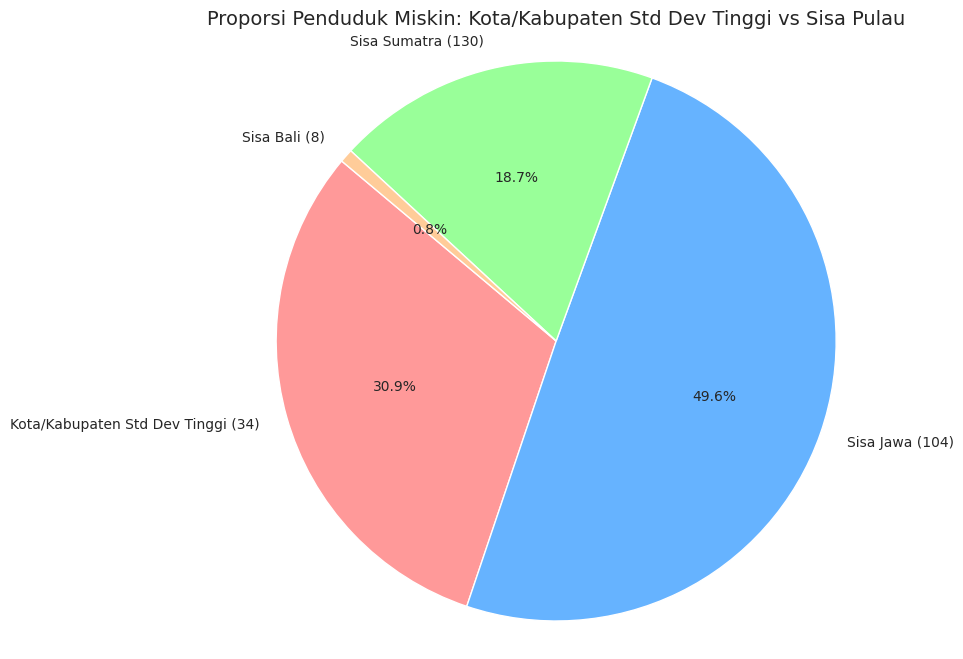

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Proporsi Penduduk Miskin: Kota/Kabupaten Std Dev Tinggi vs Sisa Pulau', fontsize=14)
plt.axis('equal') # Rasio aspek yang sama memastikan bahwa pai digambar sebagai lingkaran.
plt.show()

## Ringkasan:

### Temuan Utama Analisis Data

* Total penduduk miskin di kota/kabupaten dengan simpangan baku tinggi di Jawa, Sumatera, dan Bali adalah 6.145,92 ribu jiwa.
* Total penduduk miskin di kota/kabupaten lainnya di Jawa adalah 9.854,36 ribu jiwa.
* Total penduduk miskin di kota/kabupaten lainnya di Sumatera adalah 3.710,15 ribu jiwa.
* Total penduduk miskin di kota/kabupaten lainnya di Bali adalah 154,29 ribu jiwa.
* Diagram lingkaran ini memvisualisasikan proporsi total penduduk miskin yang disumbangkan oleh kota/kabupaten dengan simpangan baku tinggi dibandingkan dengan wilayah lainnya di setiap pulau.

### Insights

* Diagram lingkaran secara efektif menyoroti kontribusi signifikan kota/kabupaten dengan deviasi standar tinggi terhadap keseluruhan populasi miskin di pulau-pulau ini.
* Analisis lebih lanjut dapat menyelidiki karakteristik atau faktor spesifik yang berkontribusi terhadap deviasi standar tinggi dalam penanggulangan kemiskinan di kota/kabupaten yang teridentifikasi.